In [1]:
#The Purpose of this Notebook is to generate the payoff contour plots for the hetereogenous uniform case.

#Imports and Parameter Setting
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.colors as colors
import numpy as np
import pacal as pa
from mpl_toolkits.mplot3d import Axes3D  
from skimage import measure
%matplotlib inline
from tqdm import tqdm_notebook as tqdm
tqdm().pandas()


mean = 5

Using compiled interpolation routine
Using compiled sparse grid routine


C:\Users\University Vivikth\Anaconda3\lib\site-packages\tqdm\std.py:648: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [2]:
def Expected_Pooling_Gain(distributions, plot = False, size = 200, ubplot = 10, lbplot = -10, labels = []):
    '''Function that computes expected gain from pooling for number of distributions
    '''
    Poslist = []
    EV_Ring = 0
    for indx, dist in enumerate(distributions):
        Poslist.append(dist | pa.Gt(0))
        if indx == 0:
            Conv_Dist = dist
        else:
            Conv_Dist += dist
        EV_Ring += (dist.ccdf_value(0)) * (dist.ccdf_value(0) * (Poslist[indx].mean()))
    Conv_DistPos = Conv_Dist | pa.Gt(0)
    V_Pool = Conv_Dist.ccdf_value(0) * Conv_DistPos.mean() * Conv_Dist.ccdf_value(0)



    if plot:
        all_distributions = distributions + [Conv_Dist]
        ylist = []
        for i in range(len(all_distributions)):
            ylist.append(np.zeros(size))
        x = np.linspace(lbplot, ubplot, size)
        for y,dist, label in zip(ylist, all_distributions, labels):
            for indx, xval in enumerate(x):
                y[indx] = dist.pdf(xval)
            plt.plot(x, y, label = label)
            plt.legend()
        plt.show()
        
    return V_Pool - EV_Ring

        

# set the colormap and centre the colorbar
class MidpointNormalize(colors.Normalize):
	"""
	Normalise the colorbar so that diverging bars work there way either side from a prescribed midpoint value)

	e.g. im=ax1.imshow(array, norm=MidpointNormalize(midpoint=0.,vmin=-100, vmax=100))
	"""
	def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
		self.midpoint = midpoint
		colors.Normalize.__init__(self, vmin, vmax, clip)

	def __call__(self, value, clip=None):
		# I'm ignoring masked values and all kinds of edge cases to make a
		# simple example...
		x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
		return np.ma.masked_array(np.interp(value, x, y), np.isnan(value))


In [3]:
#Code used to actually compute Gains from Pooling. The file HeteroUniform.npy contains the output Z produced from this code.

# x = np.linspace(mean + np.finfo(float).eps, 20, 300) #delta
# y = np.linspace(mean + np.finfo(float).eps, 20, 300) #epsilon

# X, Y = np.meshgrid(x, y)

# Z = np.zeros((300, 300))

# for xndx, xx in enumerate(tqdm(x)):
#     for yndx, yy in enumerate(tqdm(y)):
#             distributions = [pa.UniformDistr(mean - xx, mean + xx), pa.UniformDistr(mean - yy, mean + yy)]
#             Z[xndx,yndx] = Expected_Pooling_Gain(distributions)
#np.save('HeteroUniform.npy', Z)

In [4]:
x = np.linspace(np.finfo(float).eps + 5, 20, 300) #delta
y = np.linspace(np.finfo(float).eps + 5, 20, 300) #epsilon

X, Y = np.meshgrid(x, y)

Z_1= np.load('HeteroUniform.npy')

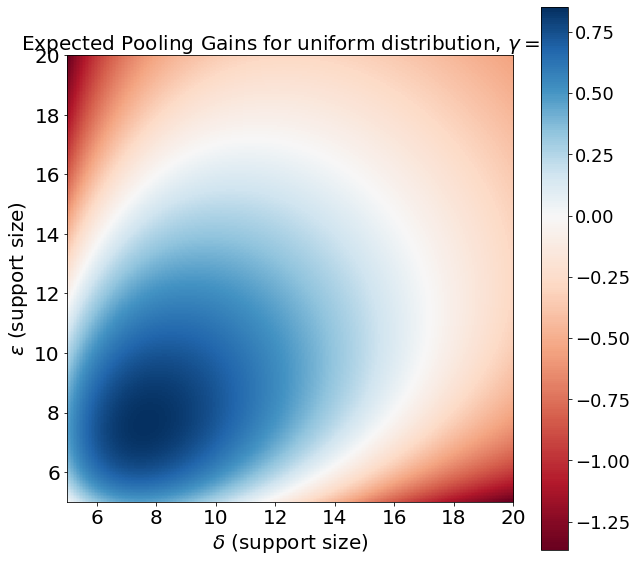

In [5]:
#Creating Contour plot

contours = measure.find_contours(Z_1, 0)

plt.figure(figsize = (10, 10))


plt.imshow(Z_1, extent=[X.min(), X.max(), Y.min(), Y.max()], origin='lower', norm = MidpointNormalize(midpoint=0),
           cmap='RdBu')
#plt.colorbar(im, cax=cax, orientation='vertical')

cb = plt.colorbar()
cb.ax.tick_params(labelsize= 18)

# for n, contour in enumerate(contours):
#     ax.plot(contour[:, 1], contour[:, 0], linewidth=2)

plt.xticks(fontsize =  20)
plt.yticks(fontsize = 20)


plt.title('Expected Pooling Gains for uniform distribution, $\gamma = 5$ ', fontsize = 20)

plt.xlabel('$\delta$ (support size)', fontsize = 20)

plt.ylabel('$\epsilon$ (support size)', fontsize = 20)

#ax.axis('image')


# ax.set_xticks()
# ax.set_yticks()
plt.savefig('HeteroUniformExpGains.pgf')
